## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import datetime as dt # used to convert date-timestamps to useable epoch forms

**More information about Pandas converters:** [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.register_matplotlib_converters.html)

Register converters for handling timestamp values in plots.

*More infomration* about [Pandas Timestamp.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html?highlight=timestamp#pandas.Timestamp) The Pandas *timestamp* is equivalent to Python’s *Datetime* and is interchangeable with it in most cases

# Kaggle Bike Sharing Demand Dataset

**Download dataset from [Kaggle](https://www.kaggle.com/c/bike-sharing-demand/data)**

*Input Features*
```season, holiday, workingday, weather, temp, atemp, humidity, windspeed, year, month, day, dayofweek, hour```

*Target*
```count```

>*Objective:*
>Provided hourly rental data spanning two years.

>For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month.

>You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period

Reference: https://www.kaggle.com/c/bike-sharing-demand/data

In [2]:
columns = ['count', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek','hour']

## Build the Data Frame

In [3]:
df = pd.read_csv('train.csv', parse_dates=['datetime'], index_col=0)
df_test = pd.read_csv('test.csv', parse_dates=['datetime'], index_col=0)

In [15]:
df.head() # data check

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00


### Convert datetime to numeric values for training

In [16]:
# Let's extract key features into separate numeric columns
def add_features(df):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour

### Add New Features

In [17]:
add_features(df) # take the previous function's build and apply to dataframe
add_features(df_test)

In [18]:
df.head() # data review showing 'year', 'month', 'day', 'dayofweek', 'hour'

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011,1,1,5,4


### Next, Predict the Missing Data

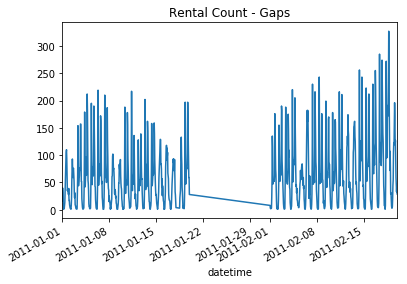

In [19]:
df['2011-01':'2011-02']['count'].plot() # grab Jan. and Feb. data
plt.title('Rental Count - Gaps')
plt.show()

The graph shows missing information near the end of the month.

### Rental Use Change on an Hourly Basis

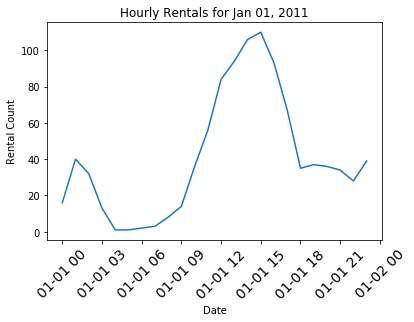

In [20]:
# For example: Jan. 1, 2011 day view
plt.plot(df['2011-01-01']['count'])
plt.xticks(fontsize=14, rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('Hourly Rentals for Jan 01, 2011')
plt.show()

### Rental View Monthly (Seasonly)

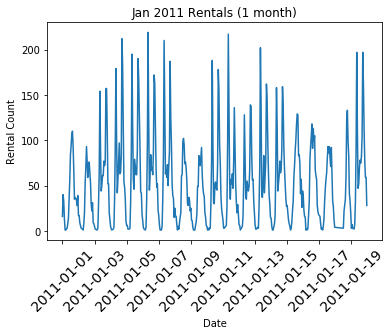

In [21]:
# Monthly
plt.plot(df['2011-01']['count'])
plt.xticks(fontsize=14, rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('Jan 2011 Rentals (1 month)')
plt.show()

**Notice:** The data ends at Jan. 19

### Grouping by Hour to find peak times

In [26]:
group_hour = df.groupby(['hour'])
average_by_hour = group_hour['count'].mean()

Text(0.5, 1.0, 'Average Hourly Rental Count')

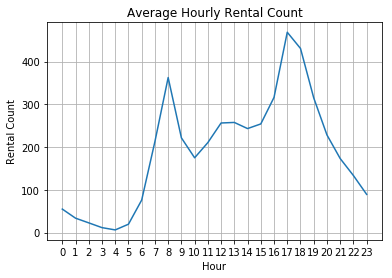

In [27]:
plt.plot(average_by_hour.index, average_by_hour)
plt.xlabel('Hour')
plt.ylabel('Rental Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Average Hourly Rental Count')

### Year-to-Year Trend

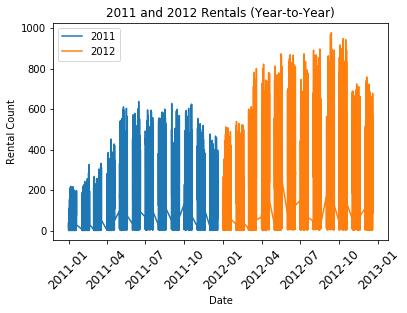

In [30]:
plt.plot(df['2011']['count'], label='2011')
plt.plot(df['2012']['count'], label='2012')
plt.xticks(fontsize=12, rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('2011 and 2012 Rentals (Year-to-Year)')
plt.legend()
plt.show()

**Note:** _The white "strips" are missing data areas in the dataframe_

### Group the years by months and average per month

In [31]:
group_year_month = df.groupby(['year','month'])

In [36]:
average_year_month = (group_year_month['count']).mean()

In [37]:
average_year_month

year  month
2011  1         54.645012
      2         73.641256
      3         86.849776
      4        111.026374
      5        174.809211
      6        196.877193
      7        203.614035
      8        182.666667
      9        174.622517
      10       174.773626
      11       155.458333
      12       134.173246
2012  1        124.353201
      2        145.646154
      3        208.276923
      4        257.455947
      5        264.109649
      6        287.186404
      7        267.037281
      8        285.570175
      9        292.598684
      10       280.508772
      11       231.980220
      12       217.054825
Name: count, dtype: float64

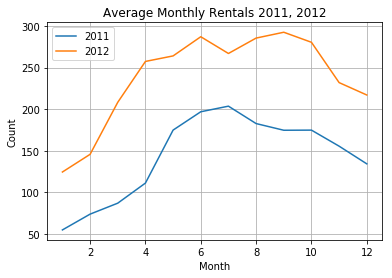

In [38]:
# Plot the monthly averages
for year in average_year_month.index.levels[0]:
    plt.plot(average_year_month[year].index, average_year_month[year], label=year)

plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Monthly Rentals 2011, 2012')
plt.legend()
plt.show()

### Group the years by hours and average per hour

In [39]:
group_year_hour = df.groupby(['year','hour'])

In [40]:
average_year_hour = (group_year_hour['count']).mean()

In [42]:
average_year_hour.head() #data check

year  hour
2011  0       43.563877
      1       26.831858
      2       19.307692
      3       10.056872
      4        5.255814
Name: count, dtype: float64

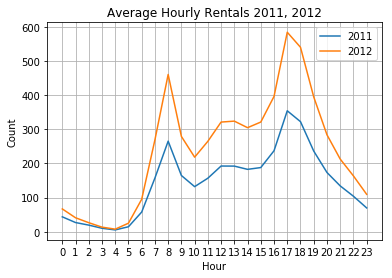

In [44]:
# Plot the hourly averages
for year in average_year_hour.index.levels[0]:
    plt.plot(average_year_hour[year].index, average_year_hour[year], label=year)

plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Average Hourly Rentals 2011, 2012')
plt.legend()
plt.show()

### Compare a Working Day to a Non-Working Day Hourly Rates

**Note:** _This working day information is found in the same named column of the dataframe_

In [45]:
group_workingday_hour = df.groupby(['workingday','hour'])
average_workingday_hour = group_workingday_hour['count'].mean()

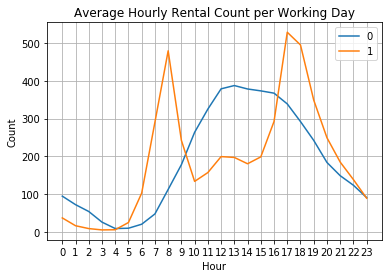

In [51]:
for workingday in average_workingday_hour.index.levels[0]: # using pandas first-level index
    plt.plot(average_workingday_hour[workingday].index, average_workingday_hour[workingday], label=workingday)

plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Average Hourly Rental Count per Working Day')
plt.legend()
plt.show()

**Note:** _Working Day is orange. Non-Working Day is blue._

## Finding Corelation between features and the target data

In [52]:
df.corr()['count'] # using pandas' correlation function

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
year          0.260403
month         0.166862
day           0.019826
dayofweek    -0.002283
hour          0.400601
Name: count, dtype: float64

**Note:** _Correlation provides an insight on the importance of the features to the overall dataframe_
* Hour is definitely important (0.40)
* Temp is also a key factor (0.39)
* Humidity has a great negative impact on usage (-0.32)

### Plot How Temp Affects Rentals

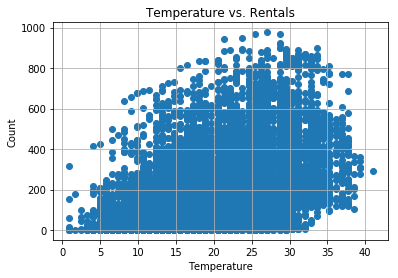

In [54]:
plt.scatter(x=df.temp, y=df['count'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.grid(True)
plt.title('Temperature vs. Rentals')
plt.show()

**Note:** _The scatterplot is all over the place. The relationship between input features and targets are not linear._
* _Casual, Registered_ and _Count_ are not in the test set data

**One approach:** Build two different models - one to predict casual and other for registered rentals.
* Add them up to find total count.

**Another approach:** Build one model to predict total rentals.

## Save point for data, so far

In [57]:
df.to_csv('bikeAll.csv', index=True, index_label='datetime', columns=columns)

## Set Up Training and Validations Sets
**Target Variable as first column followed by input features**

**Reminder: Training, Validation files do not have a column header**

* Training will be 70% of the data.
* Validation will be 30% of the data.
* Add in a randomization to the dataset

In [62]:
np.random.seed(248)
l = list(df.index)
np.random.shuffle(l) # rearrange through random shuffle
df =df.loc[l]

In [77]:
rows = df.shape[0]
train = np.int64(.7 * rows) # using a 64-bit integer, but can change to 32.
validation = rows - train

In [78]:
rows, train, validation # check

(10886, 7620, 3266)

In [79]:
columns # data header check

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [80]:
# Write Training Set
df.iloc[:train].to_csv('bikeTraining.csv',
                      index=False, header=False,
                      columns=columns)

In [81]:
# Write Validation Set
df.iloc[train:].to_csv('bikeValidation.csv',
                      index=False, header=False,
                      columns=columns)

Reminder: Test Data has only input features

In [82]:
# Test Data
df_test.to_csv('bikeTest.csv',
              index=True, index_label='datetime')

In [83]:
print(','.join(columns)) #display the columns, separated by comma

count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour


In [84]:
# Write out Column List to a file
with open('bikeTrain_column_list.txt','w') as f:
    f.write(','.join(columns))